# Mathematical Finance - Theory 1

## Returns 
- Simple Returns $$SRet_i=\displaystyle \frac{S_i-S_{i-1}}{S_{i-1}}=\frac{\Delta S_i}{S_i}$$.
- Log Returns $$LnRet_i=\ln\left(\frac{S_i}{S_{i-1}}\right)$$.
$$LnRet_i=\ln \frac{S_i}{S_{i-1}}=\ln \left(1+(\dfrac{S_i}{S_{i-1}}-1)\right)\simeq
\dfrac{S_i}{S_{i-1}}-1=SRet_i$$

so Simple Returns and Log Returns are not far different. (The
closeness of the ratio to 1 is essential for this to be true.)

## Conditional Expectations <a class="anchor" id="04"></a>     
- We will assume given a probability space $(\Omega, F, P)$
where $\Omega$ is the underlying space of simple events (for example, an event could be ``the value of stock S&P500 at time $t$ is 24")

- $P$ is a probability measure and $F$ is a collection of 
sets whose probability can be determined by probability measure $P$.  

- If we have a stochastic process $X(t,\omega)$ on this 
probability space then there will be collections of sets 
in $F$ called $F_t$ which denote those events whose 
outcomes are available up to and including time $t$. 

- These could be information about stock prices and 
Brownian motions up to time $t$. 

- The set of all these, $\{F_t\}$, is called a $filtration$.
 
- A process  $X(t,\omega)$ is said to be $adapted$ to this 
filtration if (for all $t$) the value of $X(t,\omega)$ is 
known once $F_t$ is known. Hence the value of $X$ is independent of future events which are unknown.
 
- Then there would be conditional expectations, given $F_t$, 
which are expectations with respect to a version of $P$ 
which has been updated to include the information in  $F_t$. 

- This is written as 
 $$E(X(s,\omega)|{F_t})$$

### Normal and Uniform Distributions 
**Density function $\varphi$, cdf $\Phi$ of $N(\mu,\sigma)$**

$$\varphi(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$

$$\Phi(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^xe^{\frac{-(t-\mu)^2}{2\sigma^2}}dt$$

If $X\sim N(0,1)$ then $\mu+\sqrt{\sigma}X\sim N(\mu,\sigma)$.

In Python, $\verb=numpy.random.randn(n)=$ is a vector of $n$ draws from $N(0,1)$.

**Moment Generating Function of $N(\mu,\sigma^2)$**

If $X\sim N(0,1)$ then
$$E(e^{\mu+\sigma X})=e^{\mu+\frac12 \sigma^2}$$

**Density, cdf of a Uniform Distribution on [0,1]**

Density: Let $\chi([0,1])$  be the characteristic function 0f [0,1]. It is the cdf of the uniform Distribution of [0.1].


The **uniform density** on $[a,b]$ is (if $\chi(t)=1$ if $t\in[a,b]$ and $\chi(t)=0$ if $t\notin[a,b]$)
$$\frac1{b-a}\chi([a,b])$$

* In Python, $\verb=np.random,uniform(a,b,n)=$ is a vector of $n$ draws from $Unif([a,b])$.

### Formal Definition and Properties of Brownian Motion 

A real-valued function  $ W(t,ω), t≥0 $ ($\omega$ in a probability space of events) which satisfies the following three properties is called a  **Brownian Motion**:

1.**Continuity**  $W(t,ω)$  is a continuous function in  $t$  and $W(0,ω)=0$  for all  $ω$.  

2.**Independent Increments** If  $s<t≤u<v$  then  $W(t)−W(s)$ is independent of $W(v)−W(u)$.   

3.**Normality** If   $\Delta t>0$  then    

* $W(t+\Delta t)−W(t)∼N(0,\Delta t))$     
* $W(t)=W(t)−W(0)∼N(0,t)$     
* $E(W(t))=0$     
* $\text{var}(W(t+\Delta t)−W(t))=E((W(t+\Delta t)−W(t))^2)=\Delta t$     

**Note**  
* It can be shown that every probability space with at least a countable number of independent random variables has a unique (in a sense) Brownian Motion.
* It can easily be shown that  the set of values of  $t$  at which   $W(t)$  is differentiable has probability 0 (under the uniform distribution).   $W(t)$  is said to be non-differentiable almost surely (a.s.) (it wiggles around too much). So we CANNOT write the SDE above as an ODE $\frac{dy}{dt}=ay+\sigma y\frac{dW}{dt}$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

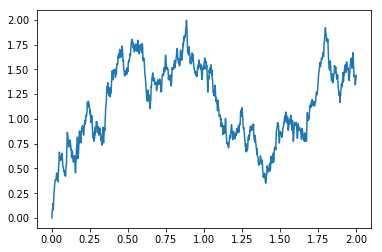

In [4]:
# Simulated Solution of dy=aydt+ dW
# Setting a=0 simulates a BM
T=2
N=1000
a=0
dt=T/(N-1)
S0=0
y=np.zeros(N)
y[0]=S0
t=np.linspace(0,T,N)
for i in np.arange(1,N):
    y[i]=y[i-1]*(1+a*dt)+np.sqrt(dt)*np.random.randn(1)
plt.plot(t,y)

## Stochastic Differential Equations 1  <a class="anchor" id="11"></a>
Let $0=t_1\le t_2<\dots<t_n=t$ and let $t_{i+1}-t_i=\Delta t$ for $i<n$. Let $S_i=S(t_i)$, $\Delta S_i=S_{i+1}-S_i$ and similarly for $W$.

We try to model a path taken by a stock $S(t)$. We know that the returns of a stock, $\frac{\Delta S_i}{S_i}$ are approximately normally distributed (at least when the returns are not too large in absolute value). So we use
$$\frac{\Delta S_i}{S_i}=\mu\Delta t + \sigma\Delta W_i$$
where $W$ is a Brownian Motion and $\Delta W_i=\varepsilon\sqrt{\Delta t}$ where $\varepsilon\sim N(0,1)$





## The Riemann Integral

If $f(t)$ is continuous then
$$\int_0^tf(u)du={\rm lim}_{n\to\infty}\sum_{i=1}^{n-1} f(t_i)\Delta t_i$$
We can take $\Delta t_i=\Delta t$ to be the same for all $i$ if the integral exists. So
$$\int_0^tf(u)du={\rm lim}_{n\to\infty}\Delta t\sum_{i=1}^{n-1} f(t_i)$$
(where ${\rm lim}_{n\to\infty}\Delta t=0$).

By the Fundamental Theorem of the Calculus we have
$$\frac d{dt}\int_0^tf(u)du=f(t)$$

## The Stochastic Integral 1 <a class="anchor" id="13"></a>

If $X_n$ is a sequence of random variables, it is said to converge (in mean square) to a random variable $X$ if $$\lim_{n\to\infty}var(X_n-X)=0$$
We write this as ${\rm vlim}_{n\to\infty} X_n=X$.

Let $f(t,\omega)$ be continuous in $t$. We define
$$\int_0^tf(u,\omega)dW(u)={\rm vlim}_{n\to\infty}\sum_{i=0}^{n-1}f(t_i,\omega)\Delta W(t_i)$$

**Note** We will write $\int_0^tf(u,\omega)dW(u)$ as $fdW$ and similarly for $dS$ and others. So $dS=fdW$ stands for the integral equation
$$\int_0^tdS(u)du=\int_0^tf(u,\omega)dW(u)$$

We will generally assume that the stochastic processes $f(t,\omega)$ are adapted to the filtration consisting of all information on $f$ up to time $t$. Then the integral is also adapted.

### Important Properties of the Stochastic integral
It can be shown that 
$$E(\int_0^Tf(t,\omega)dW(t))=0$$
and if $f$ is deterministic then
$$var(\int_0^Tf(t)dW(t))=\int_0^Tf^2(t)dt$$

If $f(t)$ is deterministic then $$\int_0^Tf(t)dW(t)\sim N(0,\int_0^Tf^2(t)dt)$$

## The Stochastic Integral 2


For the Riemann integral we have
$$\int_0^Tf(t)dt=\lim_{n\to\infty}\sum_{i=0}^{n-1}f(t_i)\Delta t_i$$
and so
$$\lim_{n\to\infty}\sum_{i=0}^{n-1}f(t_i)(\Delta t_i)^2=\lim_{n\to\infty}\Delta t \sum_{i=0}^{n-1}f(t_i)(\Delta t_i)=0\times \int f(t)dt=0$$
We write this as f(dt)^2=0. But for the stochastic integral we have
$$\lim_{n\to\infty}\sum_{i=0}^{n-1}f(t_i)(\Delta W(t_i))^2=\int_0^1f(t)dt$$
since $$var(\sum_{i=0}^{n-1}f(t_i)(\Delta W(t_i)))^2=\sum_{i=0}^{n-1}f(t_i)\sqrt{\Delta t_i}^2=\sum_{i=0}^{n-1}f(t_i)\Delta t_i\to\int_0^T f(t)dt$$
We write this as $f(dW)^2=fdt$.


## The Stochastic Integral 3

$$\lim_{n\to\infty}\sum_{i=0}^{n-1}f(t_i)(\Delta W(t_i))^2\Delta{t_i}=0\times\int_0^1f(t)dt=0$$
We abbreviate these results as follows (Box Calculus):
$$(dW)^2=dt$$
$$dtdW=dWdt=(dt)^2=0$$
For example, if
$$dS=\mu Sdt+\sigma SdW$$
then 
$$(dS)^2=\sigma^2S^2(dW)^2=\sigma^2S^2dt$$
which means
$$\int_0^t (dS(u))^2=\int_0^t\sigma^2S^2(u)du$$

Note that $$\int_0^tdS(u)du=S(t)-S(0)$$

## The Stochastic Integral 4

Ito's Formula (chain rule for stochastic calculus): If $f$ is a function of one variable then, using Taylor's Theorem naively,

$$df(S)=\frac{df}{dS}dS+\frac12\frac{d^2f}{dS^2}(dS)^2$$
So if $S$ satisfies the above equation then
$$d(S^2)=2S(\mu Sdt+\sigma SdW)+\frac12 2\sigma^2S^2dt$$
$$d(\log S)=\frac1S(\mu Sdt+\sigma SdW)-\frac12\frac1{S^2}\sigma^2S^2dt$$

## The Stochastic Integral 5

$$d\log S=(\mu-\frac12\sigma^2)dt+\sigma dW$$
$$S(0)=1$$
Integrating between 0 and $t$:
$$\log S(t)-\log S(0)=(\mu-\frac12\sigma^2)t+\sigma(W(t)-W(0))$$
$$S(t)=e^{(\mu-\frac12\sigma^2)t+\sigma W(t)}$$

## Ito Calculus <a class="anchor" id="14"></a>

The following hold:
\begin{eqnarray*}
&(dt)^2=dtdW=dWdt=0\\
&(dW)^2=dt
\end{eqnarray*}
Further
\begin{eqnarray*}
&E(\int_a^bf(t,\omega)dW(t))=0\\
&E((\int_a^bf(t,\omega)dW(t))^2)={var}(\int_a^bf(t,\omega)dW(t))=E(\int_a^bf^2(t,\omega)dt)
\end{eqnarray*}

## Chain Rule - Ito's Formula  <a class="anchor" id="15"></a>


Let $X$ be an Ito process, that is, a process satisfying $$dX=\mu dt +\sigma dW$$
Given a function $f(t,X(t,\omega))$, the
equivalent of the $Chain\ rule$ in the calculus is $Ito's\ 
Lemma$, which states:
\begin{align}
df&=\frac{\partial f}{\partial t}dt+\frac{\partial f}{\partial x}dX+\frac 12 \frac{\partial^2 f}{\partial x^2}(dX)^2\\
(dX)^2&= 0+\sigma^2 (dW)^2=\sigma^2 dt\\
df&=(\frac{\partial f}{\partial t}+ \mu\frac{\partial f}{\partial x}+\frac 12
\sigma^2\frac{\partial^2 f}{\partial x^2})dt+\sigma\frac{\partial f}{\partial x}dW
\end{align}

**Note:** The first expansion of $df$ above follows from Taylor's
Theorem  and we need only go up to terms in second order, since
$(dX)^3$ and higher order powers are all 0 - this follows from
$(dt)^2=dtdW=dWdt=0,\ (dW)^2=dt$.

**Note**
The chain rule is crucial in the success of the standard calculus and it is also crucial for the Ito calculus. 

For a more useful calculus, we need formulae for differentiating
products and quotients.

## Product and Quotient Formulae <a class="anchor" id="16"></a>
\begin{align}
\frac{d(fg)}{fg}&=\frac{df}f+\frac{dg}g+\left(\frac {df}f\right)\left(\frac{dg}g\right)\\
d(fg)&=f\,dg+g\,df+df\,dg\\
\frac{d\left(\frac fg\right)}{\frac fg}&=\frac{df}f+\frac{d\left(\frac 1g\right)}{\frac 1g}-\left(\frac {df}f\right)\left(\frac{dg}g\right)\\
&=\frac{df}f-\frac{dg}{g}+\left(\frac{dg}g\right)^2-\left(\frac {df}f\right)\left(\frac{dg}g\right)\\
\frac{d(\frac 1g)}{\frac 1g}&=-\frac{dg}{g}+\left(\frac{dg}{g}\right)^2
\end{align}

## Example <a class="anchor" id="24"></a>


We indicate a proof of the product formula above in the case where
the BMs are the same for $f$ and $g$.
$$d[(f+g)^2-f^2-g^2]=2d(fg)$$
Applying Ito's Formula to $X^2$ we obtain
$$d(X^2)=2XdX+2X.\frac12(dX)^2=2dX+(dX)^2)$$
If $X=f+g$ then $X$ is an Ito process with the same BM as $f$ and $g$. We can then apply Ito's formula
for $d(X^2)$. From the above equation we then obtain
$$[2(f+g)d(f+g)+(df+dg)^2]-[2fdf+(df)^2]-[2gdg+(dg)^2]=2d(fg)$$
This reduces to
$$fdg+gdf+dfdg=d(fg)$$
and dividing by $fg$ we get
$$\frac{d(fg)}{fg}=\frac{df}{f}+\frac{dg}{g}+\frac{df}{f}\frac{dg}{g}$$

## Explicit Solutions of some SDE  <a class="anchor" id="17"></a>
Firstly, we note that if $W$ is a standard normally distributed
random variable then by standard probability theory, we have, for
constant $\mu,\sigma$,
$$E(e^{\mu +\sigma W})=e^{\mu+\frac12\sigma^2}$$
Also if $W(t)$ is a BM and $\mu(t),\sigma(t)$ are deterministic then
$$E({\mu(t) +\int_0^t\sigma(u)dW(u)})=\mu(t) $$
$$E(e^{\mu(t) +\int_0^t\sigma(u)dW(u)})=e^{\mu(t)+\frac12\int_0^t\sigma^2(u)du} $$


## Example 1 - GBM <a class="anchor" id="18"></a>
Consider the SDE for Geometric Brownian Motion
(GBM)
$$dS=S(\mu dt+\sigma dW),\qquad S(0)=S_0$$
Define $U(t)$ by
$$U(t)=S_0e^{\nu t+\sigma W}=S(0)e^X\ where\  \ X=\nu t+\sigma W(t),\ \nu=(\mu-\frac12\sigma^2)$$
$$dX=\nu dt + \sigma dW \qquad (dX)^2=0+\sigma^2(dW)^2=\sigma^2 dt$$
 By Ito we have
$$dU=S_0de^X=S_0e^X(dX+\frac12(dX)^2)=U(\nu dt+\sigma dW+\frac12\sigma^2 dt)=U(\mu dt+\sigma dW)$$

So $U$ is a solution of the above SDE. 

If $S_0>0(<0)$ then
$S(t)>0(<0)$ for all $t$.

**Note** We can discretise the SDE by writing $S_i$ for $S$, $S_{i+1}-S_i$ for $dS$, $W_{i+1}-W_i$ for $dW$. $\Delta t$ for $dt$ and $S_0$ for the initial condition giving
$$S_{i+1}-S_i=S_i(\mu\Delta t+\sigma (W_{i+1}-W_i))$$
$$S_{i+1}=S_i(1+\mu\Delta t+\sigma \epsilon \sqrt{\Delta t}),\qquad (\epsilon\sim N(0,1))$$
(This is called the *Euler Approximation*). We can then solve this for large $n$ to get an approximation for the solution.

## Example 2 - ABM <a class="anchor" id="19"></a>
An Arithmetic Browninan Motion (ABM) is a process $x$ satisfying
$$dx=\nu dt + \sigma dW$$
so that $$x(t)=x(0)+\nu t +\sigma W(t)$$
Let $S(t)>0$ for all $t$ be a GBM and let $x=\log
S$. We will show that $\log S$ is an ABM. By Ito we have

$$ dx=\frac 1SdS-\frac12\frac 1{S^2}\sigma^2 S^2 dt=\frac{dS}S-\frac12\sigma^2 dt=\nu dt+\sigma dW$$ 

Hence
$$dx=\nu dt + \sigma dW$$
Integrating between 0 and $t$ we obtain

$$\log S(t)=(\log S(0)+ \nu t) + \sigma W(t)$$

Thus

$$\log S(t)\sim N(\log S(0)+(\mu -\frac12 \sigma^2),\sigma^2 t)$$
$S(t)$ is said to be a lognormal random variable.\\


## Example 3 - The Ornstein-Uhlenbeck Equation  <a class="anchor" id="20"></a>
We consider
$$dr=a(b-r)dt+\sigma dW(=-ar dt+(ab dt+\sigma dW))\quad (a,b,\sigma>0)$$
where $a,b,\sigma$ are constant and $r(0)$ is deterministic.
 
 The equation is called $mean-reverting$ since its expected value always converges to the
 long-term mean $b$.

 Let
 $$R(t)=e^{at}r(t)$$
 Then
 $$dR=e^{at}(dr(t)+ardt)=e^{at}(ab dt +\sigma dW)$$
 On integrating on $[0,t]$ we get
 $$ R(t)=r(0)+b(e^{at}-1)+\sigma\int_0^t e^{a\tau}dW(\tau)$$
 or
 $$r(t)=r(0)e^{-at}+b(1-e^{-at})+\sigma\int_0^t e^{-a(t-\tau)}dW(\tau)$$
 whence taking expectations we obtain the formula 
 $$E(r(t))=r(0)e^{-at}+b(1-e^{-at})$$. 
 Thus
$$r(t)-E(r(t))=\sigma\int_0^t e^{-a(t-\tau)}dW(\tau)$$

 Note that
$$\lim_{t\to\infty}E(r(t))=b$$
 The equation is called $mean-reverting$ since its expected value always converges to the
 long-term mean $b$.

 and
 $$ var (r(t))=E((r(t)-E(r(t))^2)=\sigma^2\int_0^t e^{-2a(t-\tau)}d\tau =
 \frac{\sigma^2}{2a}(1-e^{-2at})$$
 We have the reverting property of the variance:
$$ \lim_{t\to\infty}var(r(t))=\frac{\sigma^2}{2a}$$

## Note: 
1. The solution $r(t)$ does not converge pointwise as
$t\to\infty$. It does, however, converge in distribution.           
2. $b$ is called the $long\ term\ mean$ and $\sigma^2/2a$ is
called the $long\ term\ variance$.
3. The constant $a$ determines how fast the convergence to the long
term mean takes place. It is called the {\it speed of reversion}.




## Remark 
The Ornstein-Uhlenbeck Equation has a solution which
approaches a steady state after a (possibly long) period of time. This property is called $stationarity$.
The equation is therefore suited to modelling quantities like
interest rates and volatility. However, looking at the form of the
solution, the integral $\int_0^t e^{-a(t-\tau)}dW(\tau)$ can take on
arbitrarily large negative values, depending on the Brownian path,
and so the solution could go negative, which would not be
appropriate for interest rates and volatility. For this reason, a
factor of $\sqrt{r}$ is often inserted in the coefficient of $dW$.
Under certain conditions on the parameters, this prevents the
solution from taking negative values. This is known as the CIR
equation (after authors Cox-Ingersoll-Ross). Note that if the latter
equation is discretised to obtain an approximate solution, the
disctretised equation may nevertheless go negative.


## Application to Portfolio Theory  <a class="anchor" id="21"></a>

We work in  Black-Scholes Market consisting of a stock priced at $S(t)$ which can be bought and sold freely and a Bank Account providing borrowing and lending at the constant risk-free rate $r$. We assume a GBM model for $S$. Thus:

\begin{align}
\frac{dS}{S}&=\mu dt+\sigma dW\quad(\sigma,\mu{\ constant})\\
\frac{dB}{B}&=rdt
\end{align}

The equation for $B$ is also a GBM with zero volatility. We know the explicit form of the solutions to these equations but we will not need them in this section - note that $B(t)=B(0)e^{rt},\ S(t)=S(0)e^{(\mu-\frac12\sigma^2)t+\sigma W(t)}$.

## Note
In the theorems below we will not state explicitly the differentiability and integrability conditions on the functions unless there is something special about them. We will assume that the operations are possible under suitable smoothness assumptions.


A **Portfolio** with value process $V(t,\omega)$ is a pair of left continous processes $(\phi,\psi)$ such that $V=\phi B+\psi S$. We often refer to this as the portfolio $V$.

$V$ is called {\it self-financing} if $dV=\phi dB+\psi dS$. This implies that instantatneous change in the portfolio only depends on the change of $B,S$ and not on changes in the quantities of assets in the portfolio or on capital that is injected into or removed from the portfolio from outside.

## Theorem

1. Let $V(t,S(t))$ be a self-financing portfolio. Then $V(t,x)$ satisfies
$$V_t+\frac12 \sigma^2 x^2 V_{xx}+rxV_x-rV=0\qquad {Black-Scholes(BS)\ PDE}$$
2. Let $V(t,x)$ be a solution of BS PDE. Then there exist $(\phi,\psi)$
such that $V(t,S(t))=\phi B+\psi S$ is self-financing. $(\phi,\psi)$
are given explicitly by
$$\phi =\frac{V(t,S(t))-V_x(t,S(t))S(t)}{B(t)},\ \psi=V_x(t,S(t))$$


## Note
For any $V$ and arbitrary $\psi$ we can write
$V=((V-\psi S)/B) B +\psi S$. The point of (b) is that by choice of
$\psi = V_x$ we obtain a self-financing portfolio.

### Proof 
1. Let
\begin{align}
V &=\phi B+\psi S\\
dV &=\phi dB+\psi dS
\end{align}
Then
\begin{align}
dV &=\phi dB+\psi S(\mu dt+\sigma dW)\\
 &=(r\phi B+\mu\psi S)dt +\sigma\psi SdW\\
 &=(r(V-\psi S)+\mu\psi S)dt + \sigma\psi SdW
\end{align}
Also by Ito's Lemma,
$$
dV=(V_t+\frac12 \sigma^2 S^2 V_{xx}+\mu SV_x)dt+ \sigma SV_xdW
$$
By a theorem on stochastic differential equations, two Ito processes can be identical iff the coefficients of $dt,dW$ are the same a.s. Hence
$$\sigma \psi S=\sigma SV_x\ \implies\ \psi=V_x$$
and
\begin{align}
V_t+\frac12 \sigma^2 S^2 V_{xx}+\mu SV_x &=r(V-\psi S)+\mu\psi S\\
V_t+\frac12 \sigma^2 S^2 V_{xx}+rSV_x-rV &=0\quad{BS\ PDE}
\end{align}
2. Let $V(t,x)$ satisfy the BS PDE. Consider the function $V(t,S(t))$. Then
\begin{align}
dV &=((V_t+\frac12 \sigma^2 S^2 V_{xx})+\mu SV_x)dt+ \sigma SV_xdW\\
& =(r(V-SV_x)+\mu SV_x)dt+ \sigma SV_xdW\\
& =r(V-SV_x)dt+V_xdS
\end{align}
Let
$$\phi=\frac{V-V_x S}{B}, \psi=V_x$$
Then
\begin{align}
V &=\phi B+V_x S\\
&=\phi B+\psi S\\
dV&=r(V-SV_x)dt+V_xdS\\
&=r\phi Bdt+\psi dS\\
&=\phi dB +\psi dS
\end{align}
So $V$ is self-financing.
 

 

## Note
It can be proved, using the Martingale representation Theorem, that it is always possible to
construct a self-financing portfolio that has the same value as a
given vanilla option (one whose payoff depends on the value of the
stock at a fixed time $T$). We say that the portfolio $hedges$
the option. Hence vanilla option prices, such as calls and puts,
will satisfy the BS PDE. Denote the price of a call by $C(t,S(t))$.
Then at expiry time $T$ it will satisfy
$$C(T,S(T))=(S(T)-K)^+$$
where $K$ is the strike.

There are many solutions to the BSPDE and we must specify boundary
conditions to ensure that we get the correct solution. We must
satisfy the terminal condition, but also we need to find a solution
that is not too large at $\infty$. Thus we need to find a solution
to BSPDE $C(t,x)$ satisfying
 
$$C(T,x) =(x-K)^+$$
$$|C(t,x)| \le {const}\,|x|\quad {for\ all\ large\ }x$$
 
Then the call price is
$$C(t,S(t))$$

**Note** Black and Scholes, in their original 1973 paper, showed by a no-arbitrage argument that the call price satisfies the BSPDE and proceeded to solve the PDE to obtain a formula for the price. We will approach this by a different method.